In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
def MM1k (lambd, mu, k):
    rho = lambd/mu
    p_0 = (1 - rho)/(1 - rho**(k+1))
    PLR = p_0*rho**(k)
    cur_sum = 0
    for i in range(1, (k+1)):
        cur_sum += p_0 * i * rho**i
    T = cur_sum/lambd/(1 - PLR) #Little's Law
    return [p_0, T, PLR]

In [21]:
grid = np.arange(0.1, 0.91, 0.01)
theor_mm1 = pd.DataFrame(columns = ["Lambda", "Mu", "qSize", "Delay", "PLR"])
for lamb in grid:
  for k in [1, 2, 5, 10 ,25 ,50]:
    temp = pd.DataFrame(columns = ["Lambda", "Mu", "qSize", "Delay", "PLR"], index = [0])
    temp["Lambda"] = lamb
    temp["Mu"] = 1
    temp["qSize"] = k
    temp["Delay"] = MM1k(lamb, 1, k)[1] #
    temp["PLR"] = MM1k(lamb, 1, k)[2] #вероятность того, что уже в системе k заявки
    theor_mm1 = theor_mm1.append(temp)
theor_mm1 = theor_mm1.sort_values(['qSize', 'Lambda'])

In [10]:
mm1 = pd.read_table("resultMM1k.dat", sep=' ', index_col = None, header = None)
mm1.columns = ["rho", "qSize", "serviceTime", "PLR", "confidenceTime", "confidencePLR"]
mm1 = mm1.sort_values(['qSize', 'rho'])

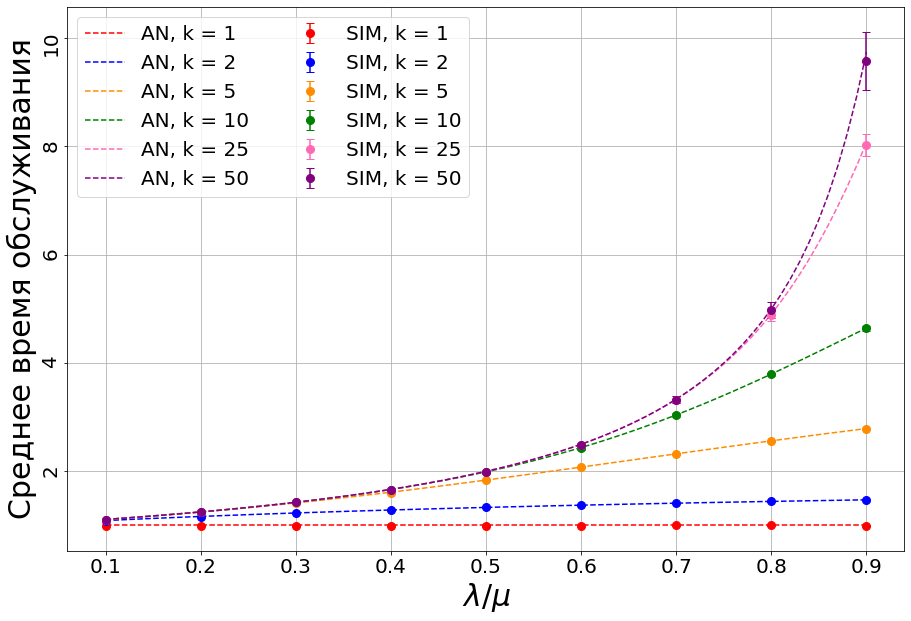

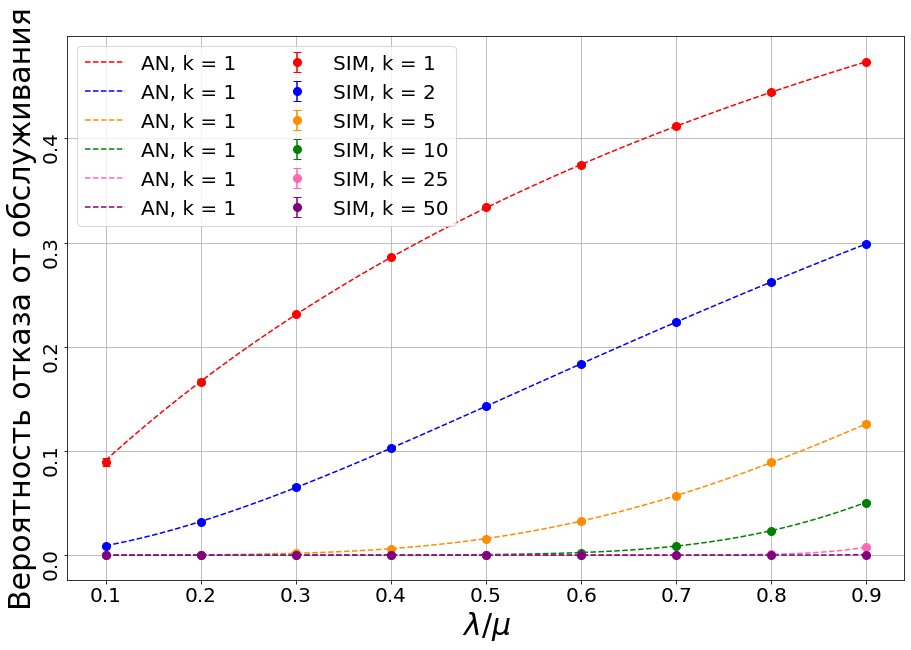

In [22]:
# plt.errorbar(mm1[0], mm1[2], mm1[4], marker = 'x', linestyle = 'None', color = 'k', label = 'simulation')
plt.figure(figsize = (15, 10))
colors = ['red', 'blue', 'darkorange', 'green', 'hotpink', 'purple']
for i in range (6):
  q = mm1.iloc[i*9, 1]
  plt.errorbar(mm1.iloc[i*9:i*9 + 9, 0], mm1.iloc[i*9:i*9 + 9,2], mm1.iloc[i*9:i*9 + 9,4], marker = 'o', ms = 8, capsize=4, linestyle = 'None', color = colors[i], label = 'SIM, k = {}'.format(q))  
  plt.plot(theor_mm1.iloc[i*81:i*81 + 81, 0]/theor_mm1.iloc[i*81:i*81 + 81, 1], theor_mm1.iloc[i*81:i*81 + 81,3], ms = 0, linestyle = '--', color = colors[i], label = 'AN, k = {}'.format(q))
plt.xlabel(r'$\lambda / \mu$', size = 30)
plt.ylabel('Среднее время обслуживания', size = 30)
plt.grid()
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=90)
plt.legend(loc='best', fontsize = 20, ncol = 2)
plt.savefig("service_time_MM1.png")

plt.figure(figsize = (15, 10))
colors = ['red', 'blue', 'darkorange', 'green', 'hotpink', 'purple']
for i in range (6):
  q = mm1.iloc[i*9, 1]
  plt.errorbar(mm1.iloc[i*9:i*9 + 9, 0], mm1.iloc[i*9:i*9 + 9,3], mm1.iloc[i*9:i*9 + 9,5], marker = 'o', capsize = 4, ms = 8, linestyle = 'None', color = colors[i], label = 'SIM, k = {}'.format(q))  
for i in range (6):
  q = theor_mm1.iloc[i*81, 1]
  plt.plot(theor_mm1.iloc[i*81:i*81 + 81, 0]/theor_mm1.iloc[i*81:i*81 + 81, 1], theor_mm1.iloc[i*81:i*81 + 81,4], ms = 0, linestyle = '--', color = colors[i], label = 'AN, k = {}'.format(q))
plt.xlabel(r'$\lambda / \mu$', size = 30)
plt.ylabel('Вероятность отказа от обслуживания', size = 30)
# plt.set_ylim([0, 0.3])
plt.grid()
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=90)
plt.legend(loc='best', fontsize = 20, ncol = 2)
plt.savefig("plr_MM1.png")

In [ ]:
md1 = pd.read_table("resultMD10.dat", sep=' ', index_col = None, header = None)
md1.columns = ["rho", "qSize", "serviceTime", "PLR", "confidenceTime", "confidencePLR"]
md1 = md1.sort_values(['qSize', 'rho'])

mm0 = pd.read_table("resultMM10.dat", sep=' ', index_col = None, header = None)
mm0.columns = ["rho", "qSize", "serviceTime", "PLR", "confidenceTime", "confidencePLR"]
mm0 = mm0.sort_values(['qSize', 'rho'])

In [ ]:
md1

,rho,qSize,serviceTime,PLR,confidenceTime,confidencePLR
0,0.1,0,1.055182,0.0,0.002766,0.0
1,0.2,0,1.125808,0.0,0.003636,0.0
2,0.3,0,1.216121,0.0,0.004068,0.0
3,0.4,0,1.334411,0.0,0.005976,0.0
4,0.5,0,1.499758,0.0,0.007452,0.0
5,0.6,0,1.748713,0.0,0.009615,0.0
6,0.7,0,2.166595,0.0,0.016472,0.0
7,0.8,0,3.006777,0.0,0.036347,0.0
8,0.9,0,5.475579,0.0,0.149958,0.0


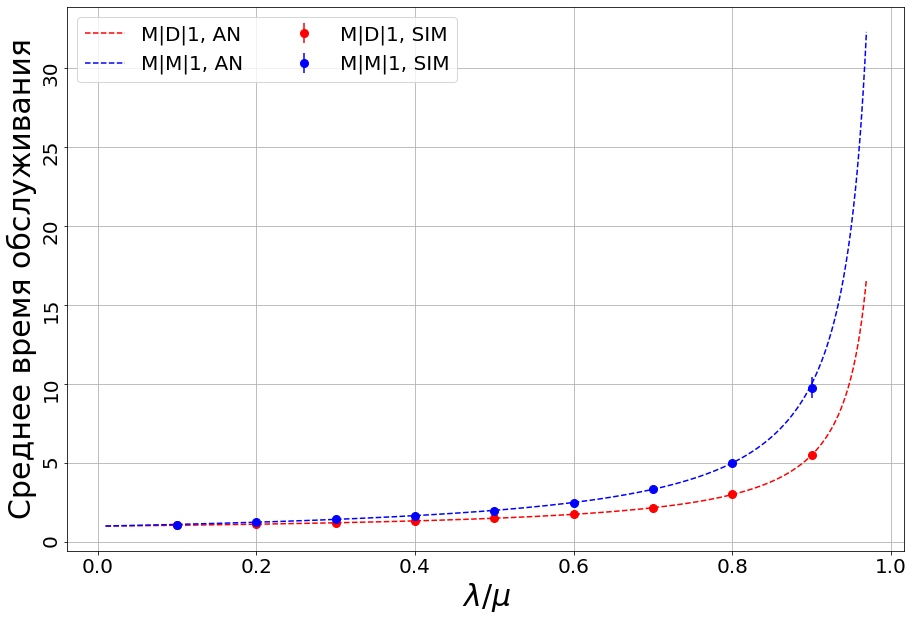

In [ ]:
plt.figure(figsize = (15, 10))
lambd_space = np.arange(0.01, 0.97, 0.001)
mu = 1
rho_space = [x/mu for x in lambd_space]

colors = ['red', 'blue', 'darkorange', 'green', 'hotpink', 'purple']

plt.errorbar(md1["rho"], md1["serviceTime"], md1["confidenceTime"], marker = 'o', ms = 8, linestyle = 'None', color = 'r', label = 'M|D|1, SIM' ) 
plt.plot(rho_space, [1/mu+rho/(2*mu*(1-rho)) for rho in rho_space], ms = 0, linestyle = '--', color = 'r', label = 'M|D|1, AN')

plt.errorbar(mm0["rho"], mm0["serviceTime"], mm0["confidenceTime"], marker = 'o', ms = 8, linestyle = 'None', color = 'b', label = 'M|M|1, SIM' ) 
plt.plot(rho_space, [1/mu+rho/(mu*(1-rho)) for rho in rho_space], ms = 0, linestyle = '--', color = 'b', label = 'M|M|1, AN')

plt.xlabel(r'$\lambda / \mu$', size = 30)
plt.ylabel('Среднее время обслуживания', size = 30)
plt.grid()
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=90)
plt.legend(loc='best', fontsize = 20, ncol = 2)
plt.savefig("service_time_MD1.png")